In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
import scipy.io as sio
import matplotlib.patches as patches
import matplotlib.patches as mpatches



In [9]:
def PlotSSTMap(data,cluster=None):
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16,8))
    
    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer
    cmap.set_bad(color="lightgreen")

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0 # Maximum value for the color scale
    
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    

    colors = ['#444444','#333333', '#191970', '#228B22', '#800000',  '#800080',  
              '#2E8B57','#483D8B','#008080','#000080','#708090','#556B2F']
    
    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor=colors[i],facecolor='None')
        ax.add_patch(rect)
        i+=1
        
           
    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Temperature')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'{cluster}')
    
    plt.savefig(f'{cluster}.png', dpi=100, bbox_inches='tight')


In [3]:
rainfall=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Yearly Mean 1901-2022.csv",index_col=0)
sst_grid=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SST Grid Values 1901-2022.csv",index_col=0)

In [4]:
sst_grid

,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,0x9,...,88x170,88x171,88x172,88x173,88x174,88x175,88x176,88x177,88x178,88x179
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8,-1.8


In [5]:
correlation_coefficients = sst_grid.corrwith(rainfall.squeeze(), axis=0)


In [6]:
corr_matrix = correlation_coefficients.to_numpy()
corr_matrix = corr_matrix.reshape(89, 180)

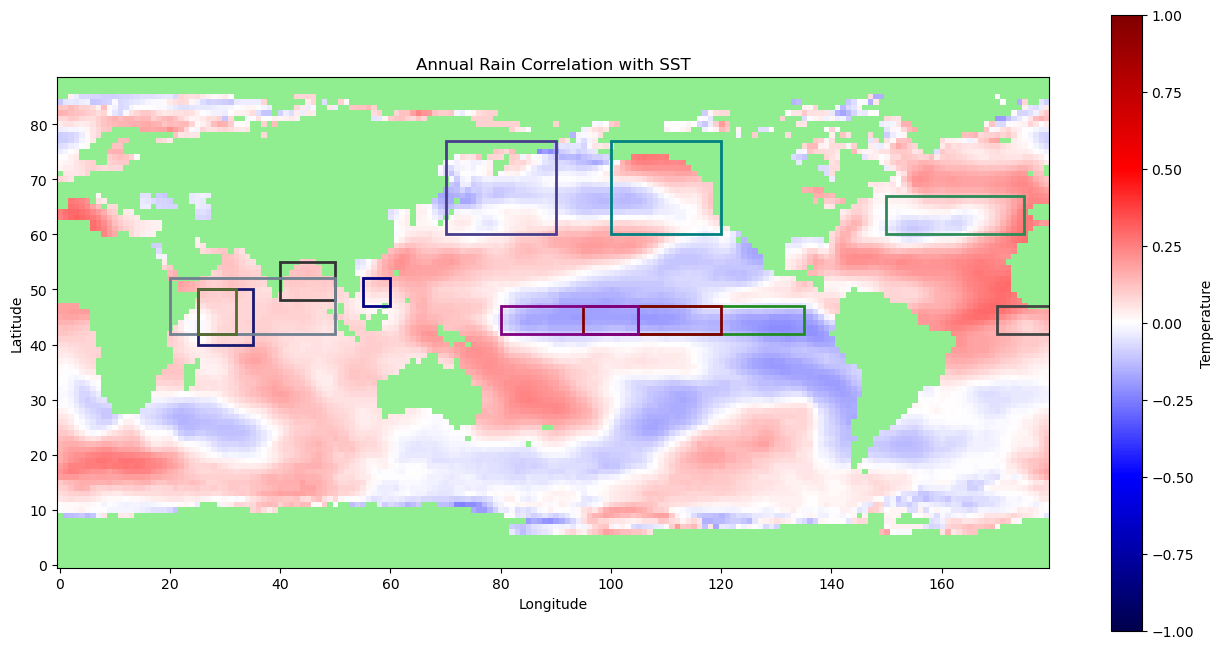

In [10]:
PlotSSTMap(corr_matrix,"Annual Rain Correlation with SST")

In [8]:
print("Max correlation value : ",correlation_coefficients.max())
print("Min correlation value : ",correlation_coefficients.min())

Max correlation value :  0.30635146354972653
Min correlation value :  -0.24804105180776045
